In [1]:
import pandas as pd
import numpy as np

from OLS import OLS
from StandardScaler import StandardScaler
from stat_tests import AR1, ADF, BP, SW

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [14]:
s = StandardScaler()
rgdp = pd.read_csv('./data/fred/GDPC1.csv', low_memory=False, encoding='utf-8')
unrate = pd.read_csv('./data/fred/UNRATE.csv', low_memory=False, encoding='utf-8')
fedrate = pd.read_csv('./data/fred/DFF.csv', low_memory=False, encoding='utf-8')

set = [rgdp, unrate, fedrate]
for df in set:
    df.set_index("observation_date", inplace=True)
    print(df.isna().sum().sum())


0
0
0


In [16]:
target = pd.Series(rgdp['GDPC1'])
X = pd.concat([rgdp, unrate.loc[rgdp.index], fedrate.loc[rgdp.index]], axis=1)
print(X.isna().sum().sum())
X = X.shift(1).dropna(how='any')
target = target.loc[X.index]

X.notna().all().all() == target.notna().all().all() == True, len(X) == len(target)

0


(np.True_, True)

In [17]:
# House Price Data Prep
# yn_map = {"yes": 1, "no": 0}
y = target.values

# Map binaries to 0/1
# X.mainroad = X.mainroad.map(yn_map)
# X.guestroom = X.guestroom.map(yn_map)
# X.basement = X.basement.map(yn_map)
# X.hotwaterheating = X.hotwaterheating.map(yn_map)
# X.airconditioning = X.airconditioning.map(yn_map)
# X.prefarea = X.prefarea.map(yn_map)

# # Get One-Hot for categoricals
# furnish_dummies = pd.get_dummies(X.furnishingstatus, drop_first=True).astype(int)
# X = X.drop(columns=["furnishingstatus"])
# X = pd.concat([X, furnish_dummies], axis=1)

# # Remove colnames for symbolic brevity
# X = s.fit_transform(X) # Uncomment to normalize the dataset
X = X.values

In [18]:
X_test = X[-1]
y_yest = y[-1]

X_fit = X[:-1, :]
y_fit = y[:-1]

ols = OLS(X_fit, y_fit)
fit = ols.fit(diagnosis_trend="n")
y_fit

array([10083.855, 10090.569,  9998.704,  9951.916, 10029.51 , 10080.195,
       10115.329, 10236.435, 10347.429, 10449.673, 10558.648, 10576.275,
       10637.847, 10688.606, 10833.987, 10939.116, 11087.361, 11152.176,
       11279.932, 11319.951, 11353.721, 11450.31 , 11528.067, 11614.418,
       11808.14 , 11914.063, 12037.775, 12115.472, 12317.221, 12471.01 ,
       12577.495, 12703.742, 12821.339, 12982.752, 13191.67 , 13315.597,
       13426.748, 13604.771, 13827.98 , 13878.147, 14130.908, 14145.312,
       14229.765, 14183.12 , 14271.694, 14214.516, 14253.574, 14372.785,
       14460.848, 14519.633, 14537.58 , 14614.141, 14743.567, 14988.782,
       15162.76 , 15248.68 , 15366.85 , 15512.619, 15670.88 , 15844.727,
       15922.782, 16047.587, 16136.734, 16353.835, 16396.151, 16420.738,
       16561.866, 16611.69 , 16713.314, 16809.587, 16915.191, 16843.003,
       16943.291, 16854.295, 16485.35 , 16298.262, 16269.145, 16326.281,
       16502.754, 16582.71 , 16743.162, 16872.266, 

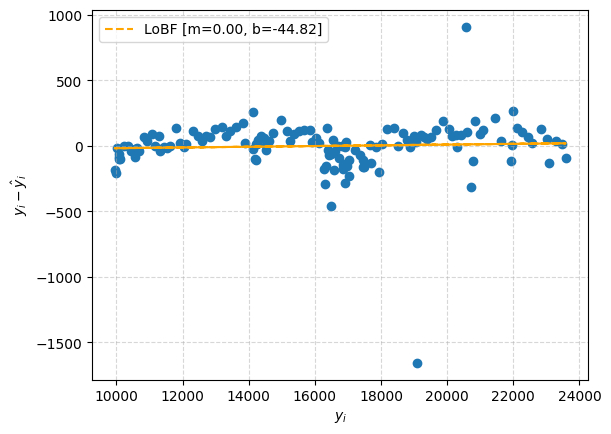

In [19]:
n = len(fit.resid)
m, b = np.polyfit(y_fit, fit.resid, 1)

line = m * y_fit + b


plt.scatter(y_fit, fit.resid)
plt.plot(y_fit, line, label=f"LoBF [{m=:.2f}, {b=:.2f}]", linestyle="--", color="orange")

plt.xlabel(r"$y_i$")
plt.ylabel(r"$y_i - \hat{y}_i$")

plt.grid(alpha=0.5, linestyle="--")

plt.legend()
plt.show()

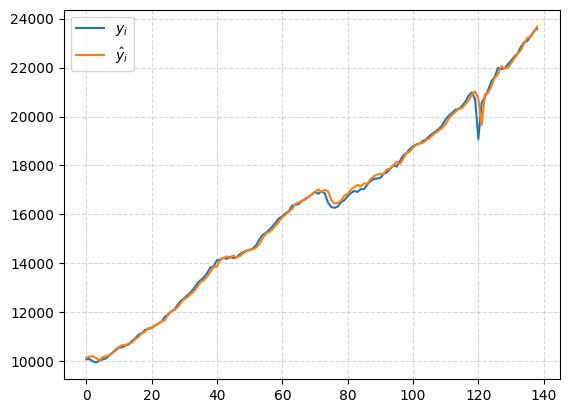

In [20]:
x = np.array([i for i in range(len(y_fit))])
plt.plot(x, y_fit, label=r"$y_i$")
plt.plot(x, fit.fitted_values, label=r"$\hat{y}_i$")

plt.grid(alpha=0.5, linestyle="--")
plt.legend()
plt.show()

In [21]:
fit.resid_heteroske

reject: False
pval: 0.606012576458585
test_stat: 2.9847176309228276
stat_name: Breusch-Pagan Test (Chi^2 Statistic)

In [22]:
print(ols.predict(X_test))
fit.resid_normality

23769.436545174263


reject: True
pval: 8.033498095498882e-17
test_stat: 0.6460530293667246
stat_name: Shapiro-Wilk Test (Approximated Z-Statistic)

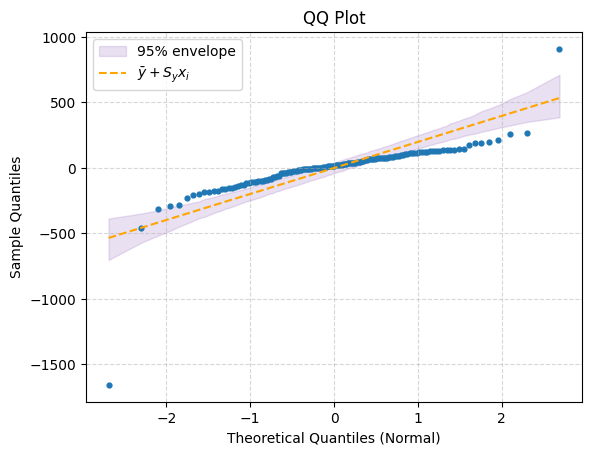

In [24]:
fit.qq(line="45")

In [79]:
fit

fitted_values: [146.01876328  97.26988959  79.9014969   57.72945455  69.93282441
 136.34049287  80.33801779  80.45047975 128.07093607  61.87559407
 126.72793002  35.81649909 101.6063201   46.77451178  74.74645247
 192.74751842  52.89832335  99.5881887  131.25151689  86.01620554
 141.35982777  83.33856571  74.25224878 122.85841108  60.82313154
  63.36545627 206.23507556 174.22066624 116.27416043 126.10689591
  99.09545988  82.54856522  94.01913649  43.61941504  73.42795716
 147.23798798  82.7469593   53.28574233 164.99409539  69.51802696
 121.36418981 134.04855374  77.26558688 133.65305592  79.48464296
 117.4158032  113.17269662 145.20272298 120.28037351  53.7307736
 105.69126168  58.79534116 119.29827618  90.21592266 116.86649496
  53.26405383  78.64358014 126.91604055  99.29092165 123.11796852
 176.92302747 187.42957384 129.34693643 189.7911983  112.933106
 120.46120139 112.8334748  100.64784693  94.6161428  174.38898419
  59.7252178  110.79923692 113.85380946  86.10922817  85.3624760